In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [2]:
IMAGE_SIZE = 30
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'Train',
    shuffle = True,
    batch_size = BATCH_SIZE,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    seed = 123,
)

Found 39209 files belonging to 43 classes.


In [4]:
cls_names = dataset.class_names
cls_names

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '5',
 '6',
 '7',
 '8',
 '9']

In [5]:
class_names_in_num = list(cls_names)
class_names_in_num = [int(i) for i in class_names_in_num]
class_names_in_num

[0,
 1,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 2,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 3,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 4,
 40,
 41,
 42,
 5,
 6,
 7,
 8,
 9]

In [6]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }


In [7]:
CLASS_NAMES = []
for i in class_names_in_num:
    CLASS_NAMES.append(classes[i])
CLASS_NAMES

['Speed limit (20km/h)',
 'Speed limit (30km/h)',
 'No passing veh over 3.5 tons',
 'Right-of-way at intersection',
 'Priority road',
 'Yield',
 'Stop',
 'No vehicles',
 'Veh > 3.5 tons prohibited',
 'No entry',
 'General caution',
 'Dangerous curve left',
 'Speed limit (50km/h)',
 'Dangerous curve right',
 'Double curve',
 'Bumpy road',
 'Slippery road',
 'Road narrows on the right',
 'Road work',
 'Traffic signals',
 'Pedestrians',
 'Children crossing',
 'Bicycles crossing',
 'Speed limit (60km/h)',
 'Beware of ice/snow',
 'Wild animals crossing',
 'End speed + passing limits',
 'Turn right ahead',
 'Turn left ahead',
 'Ahead only',
 'Go straight or right',
 'Go straight or left',
 'Keep right',
 'Keep left',
 'Speed limit (70km/h)',
 'Roundabout mandatory',
 'End of no passing',
 'End no passing veh > 3.5 tons',
 'Speed limit (80km/h)',
 'End of speed limit (80km/h)',
 'Speed limit (100km/h)',
 'Speed limit (120km/h)',
 'No passing']

In [8]:
len(dataset)

1226

12
Speed limit (50km/h)


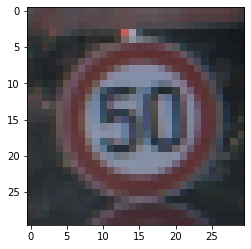

In [58]:
for images, labels in dataset.take(1):
    index = 4
    plt.imshow(images[index].numpy().astype("uint8"))
    print(labels[index].numpy())
    print(CLASS_NAMES[labels[index].numpy()])

In [9]:
for images, labels in dataset.take(1):
    print(images.shape)
    print(labels.numpy())


(32, 30, 30, 3)
[ 5 17  9  5  3 18 15 23 32 39 42  5 36 28 23  1 18 12 40 38  4 32 23 42
 40  6  1 38 41 21 40  2]


Cutom train test split function

In [10]:
def get_train_test_split(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 1000):
    assert(train_split + val_split + test_split) == 1
    if shuffle:
        ds.shuffle(shuffle_size, seed = 12)
    ds_size = len(ds)
    train_size = int(ds_size*train_split)
    val_size = int(ds_size*val_split)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = get_train_test_split(ds = dataset)

print(f"the number of batches for training: {len(train_ds)}")
print(f"the number of batches for validation: {len(val_ds)}")
print(f"the number of batches for testing: {len(test_ds)}")

the number of batches for training: 980
the number of batches for validation: 122
the number of batches for testing: 124


Cache, Shuffling and Prefetching

In [11]:
train_ds = train_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [12]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1/255),
])

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

INPUT_SHAPE = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(CLASS_NAMES)  # 43

model = tf.keras.models.Sequential([
    resize_and_rescale,
    data_augmentation,

    layers.Conv2D(32, kernel_size = (3,3), activation = "relu", input_shape = INPUT_SHAPE), # 30 -(3-1) = 28
    layers.MaxPooling2D(pool_size = (2,2)), # 28/2 = 14

    layers.Conv2D(64, kernel_size = (3,3), activation= 'relu'), # 14 -(3-1) = 12
    layers.MaxPooling2D(pool_size=(2,2)), # 12/2 = 6

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'), # 6-(3-1) = 4
    layers.MaxPooling2D(pool_size=(2,2)), # 4/2 = 2


    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape = INPUT_SHAPE)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 30, 30, 3)           0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 30, 30, 3)           0         
_________________________________________________________________
conv2d (Conv2D)              (32, 28, 28, 32)          896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 14, 14, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 12, 12, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 6, 6, 64)            0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 4, 4, 64)           

In [13]:
model.compile(optimizer = "adam", loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), metrics = ["accuracy"])
history = model.fit(
    train_ds,
    validation_data = val_ds,
    batch_size = BATCH_SIZE,
    verbose = 1,
    epochs = 50
)

Epoch 1/50
980/980 [==============================] - 424s 98ms/step - loss: 2.4764 - accuracy: 0.2703 - val_loss: 1.7987 - val_accuracy: 0.4296
Epoch 2/50
980/980 [==============================] - 41s 41ms/step - loss: 1.5168 - accuracy: 0.4954 - val_loss: 1.2662 - val_accuracy: 0.5838
Epoch 3/50
980/980 [==============================] - 43s 44ms/step - loss: 1.1696 - accuracy: 0.5984 - val_loss: 1.0695 - val_accuracy: 0.6327
Epoch 4/50
980/980 [==============================] - 40s 41ms/step - loss: 0.9624 - accuracy: 0.6697 - val_loss: 0.8100 - val_accuracy: 0.7185
Epoch 5/50
980/980 [==============================] - 39s 40ms/step - loss: 0.8173 - accuracy: 0.7169 - val_loss: 0.7264 - val_accuracy: 0.7554
Epoch 6/50
980/980 [==============================] - 39s 39ms/step - loss: 0.7223 - accuracy: 0.7499 - val_loss: 0.6395 - val_accuracy: 0.7859
Epoch 7/50
980/980 [==============================] - 35s 36ms/step - loss: 0.6448 - accuracy: 0.7787 - val_loss: 0.5763 - val_accuracy

In [14]:
scores = model.evaluate(test_ds)

124/124 [==============================] - 51s 11ms/step - loss: 0.2253 - accuracy: 0.9376


In [15]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 980}

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Lets visualize accuracy and loss

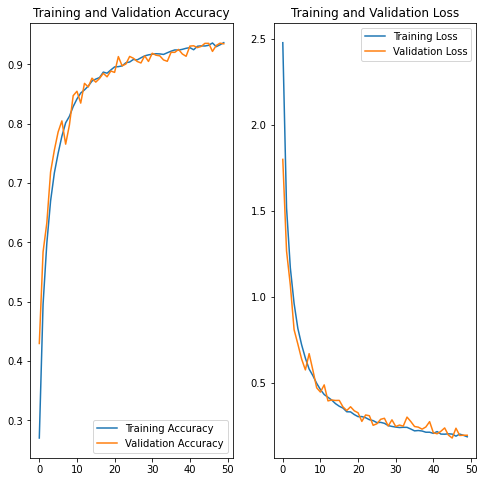

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

datasette kaçıncı index :1
Speed limit (30km/h)


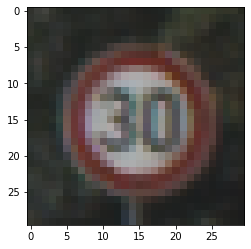

In [60]:
for images, labels in test_ds.take(1):
    index = 0
    print(f"datasette kaçıncı index :{labels[index]}")
    plt.imshow(images[index].numpy().astype("uint8"))
    print(CLASS_NAMES[labels[index].numpy()])


the index number of class according to dataset: 1
actual image: Speed limit (30km/h)
predicted_class: Speed limit (30km/h)


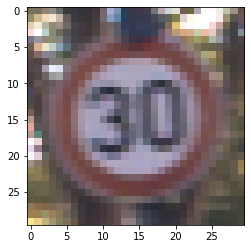

In [67]:
for images, labels in test_ds.take(1):
    index = 4
    plt.imshow(images[index].numpy().astype("uint8"))
    print("the index number of class according to dataset:",labels[index].numpy())
    print("actual image:", CLASS_NAMES[labels[index].numpy()])
    preds = model.predict(images)
    predicted_class = CLASS_NAMES[np.argmax(preds[index])]
    print("predicted_class:", predicted_class)

LETS WRITE A FUNCTION FOR INFERENCE

In [68]:
def predict(model, img):
    img_to_array = tf.keras.preprocessing.image.img_to_array(img)
    img_to_array = np.expand_dims(img_to_array, 0)

    preds = model.predict(img_to_array)
    predicted_class = CLASS_NAMES[np.argmax(preds[0])]
    confidence = round(100*(np.max(preds[0])), 2)
    return predicted_class, confidence

NOW RUN INFERENCE ON FEW SAMPLE IMAGES

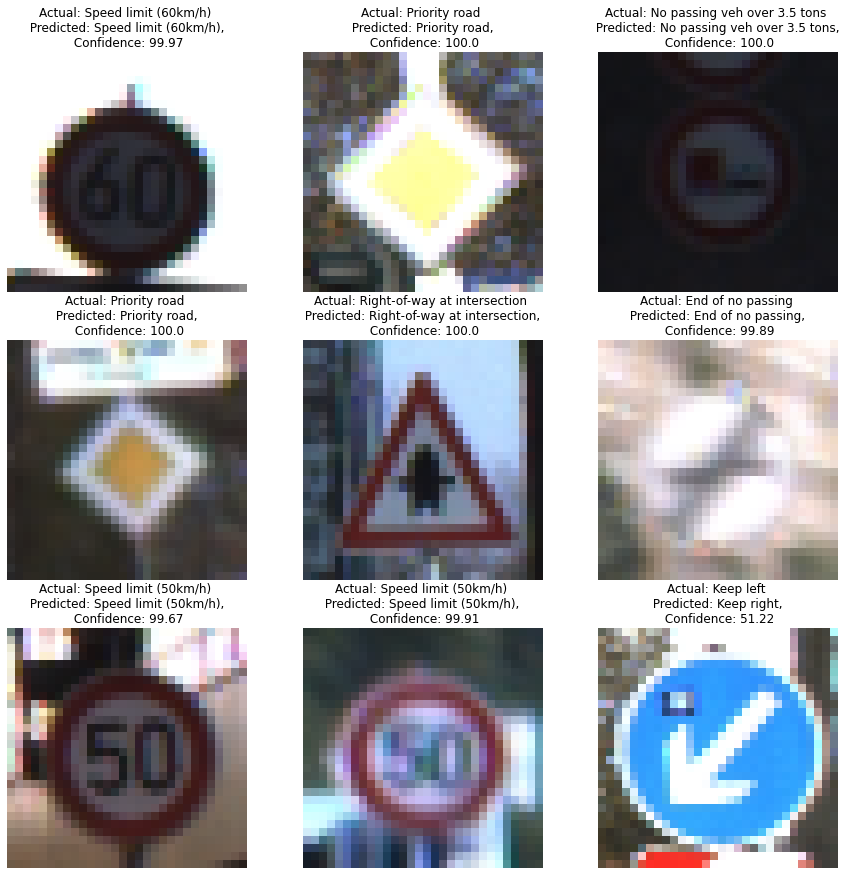

In [71]:
plt.figure(figsize = (15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        layout = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = CLASS_NAMES[labels[i]]

        plt.title(f"Actual: {actual_class} \n Predicted: {predicted_class}, \n Confidence: {confidence}")
        plt.axis("off")